# CS5950/CS4950 Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Friday April 1th, 10am**

This project has **10%** of the marks of the course.

student number : **100992058**     

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import torch.optim as optim 

In [2]:
transform_list = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)

In [3]:
print(mnist_trainset)
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,4000)]
class NN1( nn.Module ):
    
    def __init__(self): 
        super(NN1, self).__init__()
        
        self.layers = nn.Sequential(
            nn.Flatten(start_dim=1), 
            nn.Linear(784,784),
            nn.ReLU(),
            nn.Linear(784,10),
            nn.Softmax())
    
    
    def forward( self, x ): # computes the forward pass ... this one is particularly simple
        x = self.layers( x )
        return x

In [5]:
nn1= NN1()
print("\n\nparameters:")
params = [ p for p in nn1.parameters() ]
print(params)



parameters:
[Parameter containing:
tensor([[-0.0085, -0.0133, -0.0351,  ...,  0.0236, -0.0335,  0.0295],
        [ 0.0092, -0.0282, -0.0348,  ..., -0.0187, -0.0062,  0.0091],
        [-0.0035, -0.0130, -0.0286,  ..., -0.0190,  0.0179, -0.0111],
        ...,
        [ 0.0187, -0.0202, -0.0166,  ...,  0.0140, -0.0145,  0.0045],
        [-0.0173, -0.0129, -0.0282,  ...,  0.0287,  0.0005, -0.0076],
        [-0.0288,  0.0118,  0.0136,  ...,  0.0117,  0.0214, -0.0313]],
       requires_grad=True), Parameter containing:
tensor([-2.5359e-02,  1.9467e-02,  1.9523e-02, -1.5550e-02,  2.9818e-02,
         2.9631e-02, -3.3870e-02,  2.9677e-02, -1.6983e-02,  1.0526e-02,
         2.2451e-03,  2.7906e-02, -8.2311e-03, -1.5930e-03,  8.4813e-03,
         3.3275e-02,  3.9898e-03,  4.5537e-03, -2.1168e-02, -7.2864e-03,
        -2.7877e-02, -2.7112e-02,  2.7247e-02, -1.2049e-02,  3.0309e-02,
        -2.5779e-03,  1.9103e-03,  9.5296e-03,  1.6444e-02,  1.9721e-02,
        -3.3551e-02,  1.4403e-02, -1.8016

In [6]:
print("\n\nForward Pass Values:")
tmp = nn1.forward( mnist_trainset[0][0])
print(tmp)



Forward Pass Values:
tensor([[0.1108, 0.1006, 0.1087, 0.0944, 0.0989, 0.1033, 0.0892, 0.0957, 0.1040,
         0.0943]], grad_fn=<SoftmaxBackward0>)


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [7]:
loss_function = nn.CrossEntropyLoss()

In [8]:
trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=52, shuffle=False)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=52, shuffle=False)

optimizer1 = optim.RMSprop( nn1.parameters(), lr=0.001 )
losslist1 = []
errorlist1 = []
for epoch in range(100):
    current_loss = 0.0 
    n_mini_batches = 0
    correct = 0 
    total = 0
    
    for i, mini_batch in enumerate( trainloader, 0 ):
        images, labels = mini_batch
        optimizer1.zero_grad()
        
        outputs = nn1(images)
        loss = loss_function ( outputs, labels )
        loss.backward() 
        optimizer1.step()
        
        n_mini_batches += 1 
        current_loss += loss.item()
        _, predicted = torch.max( outputs, dim=1)
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()
    loss1=current_loss / n_mini_batches
    losslist1.append(loss1)
    error1 = (100*(1-(correct/total)))
    errorlist1.append(error1)
    print('Epoch %d loss: %.3f Accuracy on train set: %d %%' %(epoch+1, current_loss / n_mini_batches,100 * correct/total ))

Epoch 1 loss: 1.775 Accuracy on train set: 70 %
Epoch 2 loss: 1.562 Accuracy on train set: 91 %
Epoch 3 loss: 1.531 Accuracy on train set: 94 %
Epoch 4 loss: 1.515 Accuracy on train set: 95 %
Epoch 5 loss: 1.504 Accuracy on train set: 96 %
Epoch 6 loss: 1.497 Accuracy on train set: 97 %
Epoch 7 loss: 1.491 Accuracy on train set: 97 %
Epoch 8 loss: 1.487 Accuracy on train set: 97 %
Epoch 9 loss: 1.485 Accuracy on train set: 97 %
Epoch 10 loss: 1.482 Accuracy on train set: 98 %
Epoch 11 loss: 1.481 Accuracy on train set: 98 %
Epoch 12 loss: 1.480 Accuracy on train set: 98 %
Epoch 13 loss: 1.480 Accuracy on train set: 98 %
Epoch 14 loss: 1.482 Accuracy on train set: 98 %
Epoch 15 loss: 1.477 Accuracy on train set: 98 %
Epoch 16 loss: 1.476 Accuracy on train set: 98 %
Epoch 17 loss: 1.477 Accuracy on train set: 98 %
Epoch 18 loss: 1.481 Accuracy on train set: 98 %
Epoch 19 loss: 1.475 Accuracy on train set: 98 %
Epoch 20 loss: 1.474 Accuracy on train set: 98 %
Epoch 21 loss: 1.474 Accuracy

In [9]:
print(losslist1)

[1.7747599552204083, 1.561807781070858, 1.530821112843303, 1.5150686858536362, 1.5043234159420062, 1.4965523961302523, 1.4912413544469065, 1.4869883339126388, 1.4848782799460671, 1.4816290109188526, 1.4805965764181954, 1.4803181809264343, 1.479550579925636, 1.4821316050244617, 1.4773393575247231, 1.4759888045199505, 1.4766131500145057, 1.4806569551492665, 1.4750071392430888, 1.474147604657458, 1.4739792192137087, 1.4759189416835834, 1.4742081242722351, 1.4726280995777674, 1.4736242867135383, 1.4717316689429345, 1.476040895883139, 1.4719490184412374, 1.4725885979540936, 1.4714082200805862, 1.4713310746403483, 1.4715116751658452, 1.4715335291701477, 1.4732173526441896, 1.4729721066239592, 1.4718746566153191, 1.4721267610401303, 1.4710904824269282, 1.4711092927239158, 1.4741377551834305, 1.4712503312470078, 1.471110751102497, 1.4711025705585232, 1.4710999603395338, 1.4733050303025679, 1.4721371337964937, 1.471012849312324, 1.470997418676104, 1.4708332504544939, 1.4719897663438475, 1.47089

In [10]:
print(errorlist1)

[29.674999999999997, 8.674999999999999, 5.974999999999997, 4.449999999999998, 3.5250000000000004, 2.925, 2.5499999999999967, 2.200000000000002, 2.0499999999999963, 1.8000000000000016, 1.7000000000000015, 1.7750000000000044, 1.7000000000000015, 1.9499999999999962, 1.5000000000000013, 1.4499999999999957, 1.5000000000000013, 1.8000000000000016, 1.3249999999999984, 1.275000000000004, 1.2499999999999956, 1.375000000000004, 1.2249999999999983, 1.1499999999999955, 1.2249999999999983, 1.0499999999999954, 1.4499999999999957, 1.0499999999999954, 1.1249999999999982, 1.0249999999999981, 1.0249999999999981, 1.0499999999999954, 1.0249999999999981, 1.1750000000000038, 1.1249999999999982, 1.0499999999999954, 1.0750000000000037, 1.0000000000000009, 1.0000000000000009, 1.275000000000004, 1.0000000000000009, 1.0000000000000009, 1.0000000000000009, 1.0000000000000009, 1.1750000000000038, 1.0750000000000037, 0.9750000000000036, 1.0000000000000009, 0.9750000000000036, 1.0499999999999954, 0.9750000000000036,

In [11]:
correct = 0 
total = 0 
with torch.no_grad():  # we do not neet to compute the gradients when making predictions on the validation set
    for data in testloader: 
        images, labels = data
        outputs = nn1(images)
        _, predicted = torch.max( outputs, dim=1)
        total += labels.size(0)  
        correct += (predicted == labels).sum().item() 
print( "Accuracy on Test set: %d %%" %(100 * correct/total))

Accuracy on Test set: 94 %


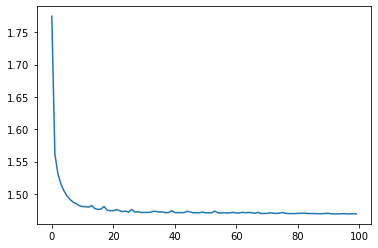

In [12]:
plt.plot(losslist1)

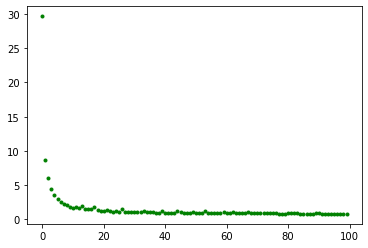

In [13]:
plt.plot(errorlist1,'g.')

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [43]:
#selecting L2 regularisation

In [14]:
nn2 = NN1()
y=[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001] #Values for different regularisation parameter
errorlist2 = []
for J in y:
    optimizer3 = optim.RMSprop(nn2.parameters(), lr=0.001, weight_decay=J )

    for epoch in range(50):
        current_loss = 0.0 
        n_mini_batches = 0
        correct1 = 0 
        total1 = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer3.zero_grad()
            outputs = nn2(images)
            loss = loss_function(outputs, labels )
            loss.backward() 
            optimizer3.step()
            n_mini_batches += 1 
            
            _, predicted = torch.max( outputs, dim=1)
            total1 += labels.size(0)  
            correct1 += (predicted == labels).sum().item()
            current_loss += loss.item()
       
       # errorlist2.append(error2)
    print(' Error Rate on Train set: %f %%' %(100*(1-correct1/total1)))
    test_total = 0
    test_correct = 0
    with torch.no_grad():  
        for data in testloader: 
            images1, labels1 = data
            outputs = nn2(images1)
            _, predicted1 = torch.max( outputs, dim=1)
            test_total += labels1.size(0)  
            test_correct += (predicted1 == labels1).sum().item()
    print( "Accuracy on Test set in with weight decay %.6f : %.2f %%" %(J,100 * test_correct/test_total))
    errorlist2.append(100 * test_correct/test_total)

 Error Rate on Train set: 93.275000 %
Accuracy on Test set in with weight decay 0.100000 : 10.05 %
 Error Rate on Train set: 9.150000 %
Accuracy on Test set in with weight decay 0.010000 : 88.95 %
 Error Rate on Train set: 1.625000 %
Accuracy on Test set in with weight decay 0.001000 : 93.10 %
 Error Rate on Train set: 0.925000 %
Accuracy on Test set in with weight decay 0.000100 : 93.74 %
 Error Rate on Train set: 0.850000 %
Accuracy on Test set in with weight decay 0.000010 : 94.08 %
 Error Rate on Train set: 0.725000 %
Accuracy on Test set in with weight decay 0.000001 : 94.19 %
 Error Rate on Train set: 0.625000 %
Accuracy on Test set in with weight decay 0.000000 : 94.32 %


In [15]:
print(errorlist2)

[10.05, 88.95, 93.1, 93.74, 94.08, 94.19, 94.32]


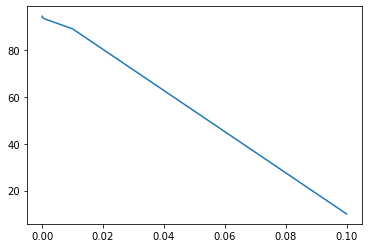

In [16]:
plt.plot(y,errorlist2)

Clearly, from the results and graph  the best accuracy we got is 94.32% and best
L2 regularisation parameter value is 0.0000001

The regularisation help model to generalize better and reduce the problem of overfitting. As the regularisation parameter increase the variance of the model decrease and bias increase

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [17]:
Values = [2000,4000,6000,8000,10000,20000,30000]
nn3 = NN1()
errorlist3=[]
testloader1 = torch.utils.data.DataLoader( mnist_testset, batch_size=52, shuffle=False)
for k in Values:
    MNIST_trainset =  [ mnist_trainset[i] for i in range(0,k)]
    trainloader1 = torch.utils.data.DataLoader( MNIST_trainset, batch_size=52, shuffle=False)
    optimizer4 = optim.RMSprop(nn3.parameters(), lr=0.001, weight_decay=0.0000001 ) #training on best parameter value.

    for epoch in range(50):
        current_loss = 0.0 
        n_mini_batches = 0
        correct2 = 0 
        total2 = 0
        for i, mini_batch in enumerate( trainloader1, 0 ):
            images, labels = mini_batch
            optimizer4.zero_grad()
            outputs = nn3(images)
            loss = loss_function(outputs, labels )
            loss.backward() 
            optimizer4.step()
            n_mini_batches += 1 
            _, predicted = torch.max( outputs, dim=1)
            total2 += labels.size(0)  
            correct2 += (predicted == labels).sum().item()
            current_loss += loss.item()
 
    print(' Error Rate on Train set: %f %%' %(100*(1-correct2/total2)))
    test_total = 0
    test_correct = 0
    with torch.no_grad():  
        for data in testloader1: 
            images1, labels1 = data
            outputs = nn3(images1)
            _, predicted1 = torch.max( outputs, dim=1)
            test_total += labels1.size(0)  
            test_correct += (predicted1 == labels1).sum().item()
    print( "Accuracy on Test set when model is trained on the set size of  %.2f : %.2f %%" %(k,100 * test_correct/test_total))
    errorlist3.append(100 * test_correct/test_total)

 Error Rate on Train set: 1.150000 %
Accuracy on Test set when model is trained on the set size of  2000.00 : 91.64 %
 Error Rate on Train set: 0.900000 %
Accuracy on Test set when model is trained on the set size of  4000.00 : 94.17 %
 Error Rate on Train set: 0.750000 %
Accuracy on Test set when model is trained on the set size of  6000.00 : 94.13 %
 Error Rate on Train set: 0.675000 %
Accuracy on Test set when model is trained on the set size of  8000.00 : 95.40 %
 Error Rate on Train set: 0.520000 %
Accuracy on Test set when model is trained on the set size of  10000.00 : 95.81 %
 Error Rate on Train set: 0.380000 %
Accuracy on Test set when model is trained on the set size of  20000.00 : 96.90 %
 Error Rate on Train set: 0.376667 %
Accuracy on Test set when model is trained on the set size of  30000.00 : 97.49 %


As more and more data is provided, it helps model to learn better with variety of features. This convolutional net learn the problem well when the
dataset size is maximum.
As we can see, the Accuracy is improving with every step but there is no such porpotionate change in loss/error in my case.

In [18]:
print(errorlist3)

[91.64, 94.17, 94.13, 95.4, 95.81, 96.9, 97.49]


In [19]:
xlog = np.log(Values)
ylog = np.log(errorlist3)

Text(0.5, 1.0, 'Log-Log Plot')

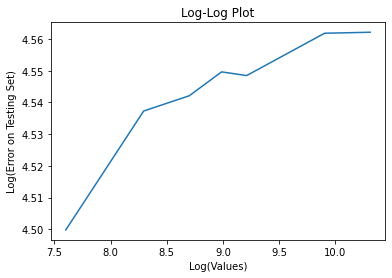

In [44]:
plt.plot(xlog, ylog)
plt.xlabel('Log(Values)')
plt.ylabel('Log(Error on Testing Set)')
plt.title('Log-Log Plot')

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [21]:
class CNN( nn.Module ):
    
    def __init__(self): 
        super(CNN, self).__init__()
        
        self.layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.Linear(1024,10),
            #nn.Linear(120,10)
    
        )
    def forward( self, x ): # computes the forward pass ... this one is particularly simple
        x = self.layers( x )
        return x

In [22]:
model1= CNN()
print("\n\nparameters:")
params = [ p for p in model1.parameters() ]
print(params)



parameters:
[Parameter containing:
tensor([[[[-0.1512, -0.1548, -0.0173],
          [-0.0906, -0.2444,  0.2750],
          [-0.3186, -0.1769, -0.2425]]],


        [[[-0.1971, -0.0032, -0.1805],
          [ 0.2529, -0.0691,  0.2432],
          [ 0.1087,  0.0105,  0.2844]]],


        [[[ 0.2534, -0.0839, -0.1131],
          [ 0.0218,  0.0159, -0.2896],
          [-0.1655, -0.0433, -0.1780]]],


        [[[ 0.1700,  0.2538, -0.2728],
          [-0.0646, -0.3210, -0.2835],
          [ 0.3003,  0.1764,  0.0568]]],


        [[[ 0.2838,  0.1106, -0.0612],
          [-0.3009,  0.0165,  0.2572],
          [ 0.1096,  0.0265,  0.2624]]],


        [[[ 0.1045, -0.1564,  0.1655],
          [-0.3155,  0.0471,  0.2254],
          [ 0.0727,  0.2581,  0.1511]]],


        [[[ 0.0394, -0.0795, -0.2273],
          [-0.2327,  0.2418,  0.1371],
          [-0.2008, -0.1921,  0.2089]]],


        [[[ 0.1131, -0.0996,  0.0323],
          [-0.2752, -0.1717,  0.0115],
          [ 0.0930, -0.3051, -0.2118]]

In [23]:
output = model1( mnist_trainset[0][0].view(1,1,28,28) )

output.shape

torch.Size([1, 10])

In [24]:
trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=52, shuffle=False)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=52, shuffle=False)

optimizer4 = optim.RMSprop( model1.parameters(), lr=0.001 )
newlosslist1 = []
newerrorlist1 = []
for epoch in range(100):
    current_loss = 0.0 
    n_mini_batches = 0
    correct = 0 
    total = 0
    
    for i, mini_batch in enumerate( trainloader, 0 ):
        images, labels = mini_batch
        optimizer4.zero_grad()
        
        outputs = model1(images)
        loss = loss_function ( outputs, labels )
        loss.backward() 
        optimizer4.step()
        
        n_mini_batches += 1 
        current_loss += loss.item()
        _, predicted = torch.max( outputs, dim=1)
        total += labels.size(0)  
        correct += (predicted == labels).sum().item()
    loss1=current_loss / n_mini_batches
    newlosslist1.append(loss1)
    error1 = (100*(1-(correct/total)))
    newerrorlist1.append(error1)
    print('Epoch %d loss: %.3f Accuracy on train set: %d %%' %(epoch+1, current_loss / n_mini_batches,100 * correct/total ))

Epoch 1 loss: 1.017 Accuracy on train set: 68 %
Epoch 2 loss: 0.464 Accuracy on train set: 85 %
Epoch 3 loss: 0.368 Accuracy on train set: 88 %
Epoch 4 loss: 0.304 Accuracy on train set: 91 %
Epoch 5 loss: 0.257 Accuracy on train set: 92 %
Epoch 6 loss: 0.222 Accuracy on train set: 94 %
Epoch 7 loss: 0.196 Accuracy on train set: 94 %
Epoch 8 loss: 0.176 Accuracy on train set: 95 %
Epoch 9 loss: 0.161 Accuracy on train set: 95 %
Epoch 10 loss: 0.149 Accuracy on train set: 95 %
Epoch 11 loss: 0.139 Accuracy on train set: 96 %
Epoch 12 loss: 0.130 Accuracy on train set: 96 %
Epoch 13 loss: 0.123 Accuracy on train set: 96 %
Epoch 14 loss: 0.116 Accuracy on train set: 96 %
Epoch 15 loss: 0.110 Accuracy on train set: 96 %
Epoch 16 loss: 0.104 Accuracy on train set: 96 %
Epoch 17 loss: 0.099 Accuracy on train set: 97 %
Epoch 18 loss: 0.094 Accuracy on train set: 97 %
Epoch 19 loss: 0.090 Accuracy on train set: 97 %
Epoch 20 loss: 0.086 Accuracy on train set: 97 %
Epoch 21 loss: 0.082 Accuracy

In [25]:
print(newlosslist1)

[1.016741305976719, 0.46422886964562654, 0.3676137517799031, 0.30425880955798285, 0.25713984513437593, 0.2221001208602608, 0.19580674456892075, 0.1762619207722026, 0.16096643764864316, 0.148849433142837, 0.13874187385784342, 0.13017587165360328, 0.12271575443446636, 0.11583696929858876, 0.11002318111139459, 0.10431517740445477, 0.09910354644737461, 0.09443925887152746, 0.08983638282720145, 0.08576845037811376, 0.08185504305527194, 0.0780045652350822, 0.07450971437932609, 0.07109379228930195, 0.06787379979845379, 0.06495163295805068, 0.062185978335509824, 0.059531542690253104, 0.05702729711260695, 0.054614147086712445, 0.05230142842591196, 0.05004477857720929, 0.047893227924677456, 0.04579166570896065, 0.04374163923482713, 0.04169270479991161, 0.039935751869524645, 0.03803146693117723, 0.03618079740493619, 0.03440616230855321, 0.0327850022177853, 0.03131424163939891, 0.0296618740993564, 0.028212645154615693, 0.026768127858469434, 0.025460591566954533, 0.023982451487840575, 0.02279144390

In [26]:
print(newerrorlist1)

[31.899999999999995, 14.325, 11.024999999999995, 8.875, 7.225000000000003, 5.974999999999997, 5.174999999999996, 4.774999999999996, 4.400000000000004, 4.174999999999995, 3.949999999999998, 3.6499999999999977, 3.4499999999999975, 3.225, 3.1749999999999945, 3.049999999999997, 2.8000000000000025, 2.6249999999999996, 2.475000000000005, 2.375000000000005, 2.224999999999999, 2.124999999999999, 1.924999999999999, 1.849999999999996, 1.7000000000000015, 1.5750000000000042, 1.5000000000000013, 1.4499999999999957, 1.3499999999999956, 1.275000000000004, 1.200000000000001, 1.1499999999999955, 1.0499999999999954, 1.0750000000000037, 1.0249999999999981, 0.9000000000000008, 0.8000000000000007, 0.7249999999999979, 0.6750000000000034, 0.649999999999995, 0.6249999999999978, 0.6249999999999978, 0.5750000000000033, 0.5499999999999949, 0.5249999999999977, 0.5000000000000004, 0.44999999999999485, 0.4249999999999976, 0.40000000000000036, 0.3750000000000031, 0.34999999999999476, 0.34999999999999476, 0.40000000

In [27]:
CORRECT = 0 
TOTAL = 0 
with torch.no_grad():  # we do not neet to compute the gradients when making predictions on the validation set
    for data in testloader: 
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max( outputs, dim=1)
        TOTAL += labels.size(0)  
        CORRECT += (predicted == labels).sum().item() 
print( "Accuracy on Test set: %d %%" %(100 * CORRECT/TOTAL))

Accuracy on Test set: 96 %


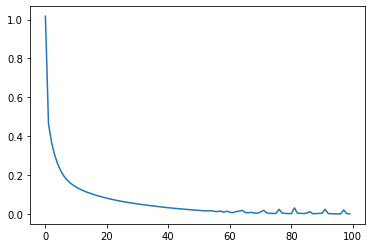

In [28]:
plt.plot(newlosslist1)

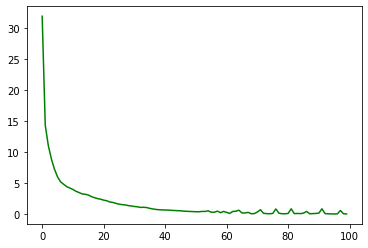

In [29]:
plt.plot(newerrorlist1,'g')

In [30]:
model2 = CNN()
y=[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
newerrorlist2 = []
for J in y:
    optimizer3 = optim.RMSprop(model2.parameters(), lr=0.001, weight_decay=J )

    for epoch in range(50):
        current_loss = 0.0 
        n_mini_batches = 0
        correct1 = 0 
        total1 = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer3.zero_grad()
            outputs = model2(images)
            loss = loss_function(outputs, labels )
            loss.backward() 
            optimizer3.step()
            n_mini_batches += 1 
            
            _, predicted = torch.max( outputs, dim=1)
            total1 += labels.size(0)  
            correct1 += (predicted == labels).sum().item()
            current_loss += loss.item()
       
       # errorlist2.append(error2)
    print(' Error Rate on Train set: %f %%' %(100*(1-correct1/total1)))
    test_total = 0
    test_correct = 0
    with torch.no_grad():  
        for data in testloader: 
            images1, labels1 = data
            outputs = model2(images1)
            _, predicted1 = torch.max( outputs, dim=1)
            test_total += labels1.size(0)  
            test_correct += (predicted1 == labels1).sum().item()
    print( "Accuracy on Test set in with weight decay %.6f : %.2f %%" %(J,100 * test_correct/test_total))
    newerrorlist2.append(100 * test_correct/test_total)

 Error Rate on Train set: 16.600000 %
Accuracy on Test set in with weight decay 0.100000 : 83.31 %
 Error Rate on Train set: 4.000000 %
Accuracy on Test set in with weight decay 0.010000 : 94.42 %
 Error Rate on Train set: 1.650000 %
Accuracy on Test set in with weight decay 0.001000 : 95.95 %
 Error Rate on Train set: 0.425000 %
Accuracy on Test set in with weight decay 0.000100 : 95.70 %
 Error Rate on Train set: 0.400000 %
Accuracy on Test set in with weight decay 0.000010 : 95.32 %
 Error Rate on Train set: 0.375000 %
Accuracy on Test set in with weight decay 0.000001 : 95.76 %
 Error Rate on Train set: 0.000000 %
Accuracy on Test set in with weight decay 0.000000 : 95.74 %


In [31]:
print(newerrorlist2)

[83.31, 94.42, 95.95, 95.7, 95.32, 95.76, 95.74]


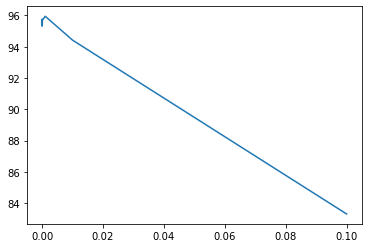

In [32]:
plt.plot(y,newerrorlist2)

best accuracy = 95.95% L2 regularisation parameter value=0.001

The optimum regularisation parameter is different in case of second model with different accuracy.

In [34]:
Values = [2000,4000,6000,8000,10000,20000,30000]
model3 = NN1()
newerrorlist3=[]
testloader1 = torch.utils.data.DataLoader( mnist_testset, batch_size=52, shuffle=False)
for k in Values:
    MNIST_trainset =  [ mnist_trainset[i] for i in range(0,k)]
    trainloader1 = torch.utils.data.DataLoader( MNIST_trainset, batch_size=52, shuffle=False)
    optimizer4 = optim.RMSprop(model3.parameters(), lr=0.001, weight_decay=0.001 )

    for epoch in range(50):
        current_loss = 0.0 
        n_mini_batches = 0
        correct2 = 0 
        total2 = 0
        for i, mini_batch in enumerate( trainloader1, 0 ):
            images, labels = mini_batch
            optimizer4.zero_grad()
            outputs = model3(images)
            loss = loss_function(outputs, labels )
            loss.backward() 
            optimizer4.step()
            n_mini_batches += 1 
            _, predicted = torch.max( outputs, dim=1)
            total2 += labels.size(0)  
            correct2 += (predicted == labels).sum().item()
            current_loss += loss.item()
 
    print(' Error Rate on Train set: %f %%' %(100*(1-correct2/total2)))
    test_total = 0
    test_correct = 0
    with torch.no_grad():  
        for data in testloader1: 
            images1, labels1 = data
            outputs = model3(images1)
            _, predicted1 = torch.max( outputs, dim=1)
            test_total += labels1.size(0)  
            test_correct += (predicted1 == labels1).sum().item()
    print( "Accuracy on Test set when model is trained on the set size of  %.2f : %.2f %%" %(k,100 * test_correct/test_total))
    newerrorlist3.append(100 * test_correct/test_total)

 Error Rate on Train set: 1.900000 %
Accuracy on Test set when model is trained on the set size of  2000.00 : 90.00 %
 Error Rate on Train set: 1.425000 %
Accuracy on Test set when model is trained on the set size of  4000.00 : 93.44 %
 Error Rate on Train set: 1.550000 %
Accuracy on Test set when model is trained on the set size of  6000.00 : 93.89 %
 Error Rate on Train set: 1.812500 %
Accuracy on Test set when model is trained on the set size of  8000.00 : 94.60 %
 Error Rate on Train set: 2.100000 %
Accuracy on Test set when model is trained on the set size of  10000.00 : 94.49 %
 Error Rate on Train set: 2.955000 %
Accuracy on Test set when model is trained on the set size of  20000.00 : 95.76 %
 Error Rate on Train set: 3.390000 %
Accuracy on Test set when model is trained on the set size of  30000.00 : 95.79 %


In [35]:
print(newerrorlist3)

[90.0, 93.44, 93.89, 94.6, 94.49, 95.76, 95.79]


In [47]:
xlog = np.log(Values)
ylog = np.log(errorlist3)
y1log = np.log(newerrorlist3)

Text(0.5, 1.0, 'Log-Log Plot')

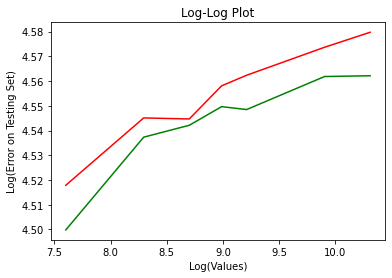

In [48]:
plt.plot(xlog, ylog,color='r')
plt.plot(xlog,y1log,color='g')
plt.xlabel('Log(Values)')
plt.ylabel('Log(Error on Testing Set)')
plt.title('Log-Log Plot')

Yes, As expected there is more rapid reduction with my second model which is convolutional net.
It is avoiding the problem of overfitting and provides good accuracy.